# Quant Trading Strategies HW 6 - Madison Rusch (12365298)
## Predictive Regression

## Data

In [268]:
import pandas as pd
import datetime as dt
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt 
import functools
import quandl
import statsmodels.regression.linear_model as linreg

@functools.lru_cache()
def fetch_quandl(table, ticker = None, begin_date = None, end_date = None):
    qdata = quandl.get_table(table,
                      date = { 'gte': begin_date, 'lte': end_date },
                      qopts = {"columns":["date", "ticker", "adj_close"]},
                      ticker = list(ticker),
                      api_key='bXgDCzJUfS5ZxasswLcN',
                      paginate=True)
    return qdata



### CDS Spread Returns (Wed-Wed)

In [269]:
cds_data = pd.read_table("../data/Liq5YCDS.delim",sep='\t')
cds_data = cds_data.drop(columns=['Unnamed: 0', 'tenor', 'upfront', 'runningcoupon', 'cdsrealrecovery', 'cdsassumedrecovery', 'docclause', 'currency', 'tier', 'impliedrating' ])
cds_data['date'] = pd.to_datetime(cds_data['date'])

tickers = tuple(cds_data['ticker'].unique())

cds_data= cds_data.sort_values('date')
cds_data = cds_data.set_index(['date', 'ticker'])['parspread'].unstack(['ticker'])
cds_data = cds_data.resample('W-WED').last()

cds_returns = pd.DataFrame(index=cds_data.index)

for col in cds_data.columns.values:
    cds_data[f'{col} Returns'] = cds_data[col].pct_change()
    cds_returns[f'{col} Returns'] = cds_data[col].pct_change()
    
cds_returns['CDS Index Return'] = cds_returns.mean(axis=1)
display(cds_returns.head(5))

,BA Returns,C Returns,DD Returns,F Returns,GE Returns,JPM Returns,LNC Returns,LOW Returns,LUV Returns,MAR Returns,NFLX Returns,T Returns,WFC Returns,XOM Returns,XRX Returns,CDS Index Return
date,,,,,,,,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,-0.057555,-0.002449,0.012286,0.017203,0.009527,0.028725,-0.021380,-0.073064,0.045735,0.036897,NaN,-0.000253,0.002160,-0.011199,-0.100206,-0.008112
2018-01-17,0.090416,-0.004649,0.046848,0.093586,0.154969,-0.020475,0.010851,0.449611,0.069635,0.137440,NaN,0.000701,0.003072,-0.019352,-0.208152,0.057464
2018-01-24,0.004652,0.006147,0.059232,0.074893,0.256980,-0.000440,0.001468,0.206392,0.073706,0.010891,NaN,-0.001168,-0.011792,-0.031147,0.117619,0.054817
2018-01-31,-0.016092,-0.018857,0.037755,0.026133,-0.007615,-0.020960,-0.002848,0.061483,0.030513,-0.071606,NaN,0.000574,-0.008457,0.003994,-0.448593,-0.031041


### Equity Adj Close Returns (Wed-Wed)

In [270]:
# Fetch data for the tickers above
begin_date = cds_data.index.min()
end_date = cds_data.index.max()

equity_data = fetch_quandl('QUOTEMEDIA/PRICES', ticker = tickers, begin_date = begin_date, end_date = end_date)
equity_data= equity_data.sort_values('date')
equity_data = equity_data.set_index(['date', 'ticker'])['adj_close'].unstack(['ticker'])
equity_data = equity_data.resample('W-WED').last()

equity_returns = pd.DataFrame(index = equity_data.index)

for col in equity_data.columns.values:
    equity_data[f'{col} Returns'] = equity_data[col].pct_change()
    equity_returns[f'{col} Returns'] = equity_data[col].pct_change()

display(equity_returns.head(5))

,BA Returns,C Returns,DD Returns,F Returns,GE Returns,JPM Returns,LNC Returns,LOW Returns,LUV Returns,MAR Returns,NFLX Returns,T Returns,WFC Returns,XOM Returns,XRX Returns
date,,,,,,,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,0.075420,0.014211,0.015743,0.021160,0.042920,0.025506,0.071882,0.023364,-0.030042,0.009161,0.036430,-0.014385,0.025341,-0.007151,0.034777
2018-01-17,0.096016,0.024058,0.021159,-0.065234,-0.083417,0.024853,0.002295,0.079749,0.049396,0.031227,0.023433,0.006281,0.012041,0.022305,0.051730
2018-01-24,-0.046494,0.025558,0.003167,-0.010673,-0.052450,0.023719,0.004338,0.053585,-0.058423,0.016831,0.201379,0.004613,0.025047,0.006023,0.013784
2018-01-31,0.058801,-0.012209,-0.005657,-0.066703,-0.016423,0.000000,-0.006479,-0.018647,-0.022665,0.020431,0.034443,0.011615,0.004582,-0.013894,0.054697


### SPY ETF Returns (Wed-Wed)

In [271]:
spy = ['SPY']
market_data = fetch_quandl('QUOTEMEDIA/PRICES', ticker = tuple(spy), begin_date = begin_date, end_date = end_date)
market_data = market_data.sort_values('date')
market_data = market_data.set_index(['date', 'ticker'])['adj_close'].unstack(['ticker'])
market_data = market_data.resample('W-WED').last()
market_data['SPY Returns'] = market_data['SPY'].pct_change()

display(market_data.head(5))

ticker,SPY,SPY Returns
date,,
2018-01-03,248.172130,NaN
2018-01-10,251.521220,0.013495
2018-01-17,256.558618,0.020028
2018-01-24,259.834303,0.012768
2018-01-31,258.659828,-0.004520


### Boxcar Analysis

In [272]:
def boxcar_16_reg(equity_returns, market_returns):
    _p = linreg.OLS(equity_returns, market_returns).fit(params_only=True).params
    df = pd.DataFrame(data=[_p], index=[equity_returns.index[-1]])
    df = df.rename(columns={'SPY Returns': 'SPY Beta'})
    return df

capm_betas = pd.DataFrame(index = equity_returns.index)

# For every ticker run a CAPM regression
for col in equity_returns.columns:
    ticker_returns = equity_returns[col].dropna()
    market_returns = market_data[market_data.index.isin(ticker_returns.index.values)]
    market_boxcar_16_coefficients = pd.concat([boxcar_16_reg(ticker_returns.iloc[i-16:i], market_returns['SPY Returns'].iloc[i-16:i]) for i in range(16, ticker_returns.shape[0])])
    ticker = col.split(' ')[0]
    capm_betas[f'{ticker} CAPM Beta'] = market_boxcar_16_coefficients
    
capm_betas = capm_betas.dropna()
display(capm_betas.head(2))

,BA CAPM Beta,C CAPM Beta,DD CAPM Beta,F CAPM Beta,GE CAPM Beta,JPM CAPM Beta,LNC CAPM Beta,LOW CAPM Beta,LUV CAPM Beta,MAR CAPM Beta,NFLX CAPM Beta,T CAPM Beta,WFC CAPM Beta,XOM CAPM Beta,XRX CAPM Beta
date,,,,,,,,,,,,,,,
2018-04-25,0.816514,0.822387,1.547017,0.258805,0.292399,0.715327,0.961894,0.946218,0.907676,1.094558,2.114587,0.23871,1.201914,1.224163,1.362702
2018-05-02,0.696447,0.820549,1.557608,0.219861,0.209255,0.686917,0.854078,0.916273,1.002414,1.111346,2.091156,0.29740,1.186870,1.281183,1.338504


In [273]:
# Then run a regression on cds spreads with equity and index returns
cds_betas = pd.DataFrame(index = cds_returns.index)

for ticker in tickers:
    ticker_cds_returns = cds_returns[f'{ticker} Returns'].dropna()
    index_returns = pd.DataFrame(cds_returns[cds_returns.index.isin(ticker_cds_returns.index.values)]['CDS Index Return']).dropna()
    ticker_equity_returns = equity_returns[equity_returns.index.isin(ticker_cds_returns.index.values)][f'{ticker} Returns'].dropna()
    
    index_returns['Equity Returns'] = ticker_equity_returns
    market_boxcar_16_coefficients = pd.concat([boxcar_16_reg(ticker_cds_returns.iloc[i-16:i], index_returns.iloc[i-16:i]) for i in range(16, ticker_cds_returns.shape[0])])
    cds_betas[f'{ticker} Equity Beta'] = market_boxcar_16_coefficients['Equity Returns']
    cds_betas[f'{ticker} Index Beta'] = market_boxcar_16_coefficients['CDS Index Return']

# Drop the NAs for the beginning (ignoring Netflix, which has NAs for another 2 years)
cds_betas = cds_betas.dropna(subset = ['BA Equity Beta'])
display(cds_betas.head(2))
    

,BA Equity Beta,BA Index Beta,C Equity Beta,C Index Beta,DD Equity Beta,DD Index Beta,F Equity Beta,F Index Beta,GE Equity Beta,GE Index Beta,...,T Equity Beta,T Index Beta,WFC Equity Beta,WFC Index Beta,XOM Equity Beta,XOM Index Beta,XRX Equity Beta,XRX Index Beta,NFLX Equity Beta,NFLX Index Beta
date,,,,,,,,,,,,,,,,,,,,,
2018-04-25,0.033503,1.445365,-0.077663,0.932708,-0.037439,1.586590,-0.567288,0.763624,-0.938447,1.045900,...,0.472716,-0.065113,-0.323750,0.805818,-0.038944,0.125390,-1.978964,0.637051,NaN,NaN
2018-05-02,0.212908,1.441192,-0.037637,0.916999,-0.113213,1.521227,-0.629038,0.758931,-1.145353,0.960597,...,0.004463,-0.104862,-0.328622,0.782501,-0.021369,0.116674,-2.469772,0.733616,NaN,NaN


In [274]:
hedge_returns = pd.DataFrame(index = equity_data.index)

for ticker in tickers:
    ticker_hedge_returns = cds_betas[f'{ticker} Equity Beta'] * equity_returns[f'{ticker} Returns'] + cds_betas[f'{ticker} Index Beta'] * cds_returns['CDS Index Return']
    # hedge_returns[f'{ticker} Returns'] = cds_returns[f'{ticker} Returns']
    # hedge_returns[f'{ticker} Hedge Return'] = ticker_hedge_returns
    hedge_returns[f'{ticker} Residual Returns'] = cds_returns[f'{ticker} Returns'] - ticker_hedge_returns
    hedge_returns[f'{ticker} Residual Equity Returns'] = equity_returns[f'{ticker} Returns'] - (capm_betas[f'{ticker} CAPM Beta'] * market_returns['SPY Returns'])

hedge_returns = hedge_returns.dropna(subset = ['BA Residual Returns'])
display(hedge_returns.head(5))

,BA Residual Returns,BA Residual Equity Returns,C Residual Returns,C Residual Equity Returns,DD Residual Returns,DD Residual Equity Returns,F Residual Returns,F Residual Equity Returns,GE Residual Returns,GE Residual Equity Returns,...,T Residual Returns,T Residual Equity Returns,WFC Residual Returns,WFC Residual Equity Returns,XOM Residual Returns,XOM Residual Equity Returns,XRX Residual Returns,XRX Residual Equity Returns,NFLX Residual Returns,NFLX Residual Equity Returns
date,,,,,,,,,,,,,,,,,,,,,
2018-04-25,-0.004654,0.025868,0.006722,0.026069,-0.019041,-0.026266,0.013295,0.000473,-0.094789,0.035861,...,-0.001080,0.005684,0.042724,0.084028,-0.005512,0.034140,-0.002064,0.046292,NaN,-0.033107
2018-05-02,-0.018482,-0.053318,-0.028099,-0.018414,-0.068008,0.000184,-0.004810,0.009360,-0.047390,0.009594,...,0.008125,-0.088719,-0.035044,-0.015387,-0.015704,-0.031873,0.381742,-0.038940,NaN,0.028267
2018-05-09,-0.001927,0.047922,-0.041742,0.040400,0.027322,0.001771,0.050914,-0.022038,0.057527,0.017513,...,-0.001034,-0.025309,-0.066249,0.007816,-0.010477,0.008984,-0.091369,-0.044625,NaN,0.002340
2018-05-16,-0.068103,-0.012467,0.021414,-0.009283,-0.056882,0.013492,-0.001924,0.026343,-0.042337,0.020786,...,0.004054,0.026282,-0.009321,0.011045,0.019018,0.022433,0.393374,-0.020393,NaN,-0.024511
2018-05-23,-0.005685,0.050302,0.002446,-0.027430,-0.002739,-0.021300,-0.048408,0.001906,-0.029629,-0.059301,...,0.002348,-0.000070,-0.000592,0.015479,0.005526,-0.004075,0.037624,-0.022645,NaN,0.042805


### Boxcar Regression of Predictive Model

In [275]:
predictive_residuals = pd.DataFrame(index = hedge_returns.index)

for ticker in tickers:
    hedge_returns[f'{ticker} Residual Equity Returns'] = hedge_returns[f'{ticker} Residual Equity Returns'].shift(1)
    shifted_equity_ret = hedge_returns[f'{ticker} Residual Equity Returns'].dropna()
    residual_ret = hedge_returns[hedge_returns.index.isin(shifted_equity_ret.index.values)][f'{ticker} Residual Returns']
    # market_returns = market_data[market_data.index.isin(ticker_returns.index.values)]
    market_boxcar_16_coefficients = pd.concat([boxcar_16_reg(residual_ret.iloc[i-16:i], shifted_equity_ret.iloc[i-16:i]) for i in range(16, residual_ret.shape[0])])
    predictive_residuals[f'{ticker} Predictive Beta'] = market_boxcar_16_coefficients
    
predictive_residuals = predictive_residuals.dropna(subset = ['BA Predictive Beta'])
display(predictive_residuals.head(5))

,BA Predictive Beta,C Predictive Beta,DD Predictive Beta,F Predictive Beta,GE Predictive Beta,JPM Predictive Beta,LNC Predictive Beta,LOW Predictive Beta,LUV Predictive Beta,MAR Predictive Beta,T Predictive Beta,WFC Predictive Beta,XOM Predictive Beta,XRX Predictive Beta,NFLX Predictive Beta
date,,,,,,,,,,,,,,,
2018-08-15,-0.573736,-0.000937,0.389109,-0.354504,-0.130408,0.273152,-0.265162,-0.118806,0.085892,-0.823890,0.010027,0.059366,-0.031585,-0.012895,NaN
2018-08-22,-0.581641,0.051999,0.231953,-0.480535,0.000085,0.478578,-0.227541,-0.252784,-0.011818,-0.657846,0.006474,0.799582,0.102005,-1.296255,NaN
2018-08-29,-0.642491,-0.045911,0.165774,-0.489758,-0.016058,0.361765,0.039625,-0.145757,0.009220,-0.539911,-0.005611,0.611804,0.037165,-1.483722,NaN
2018-09-05,-0.436867,-0.226954,0.127697,-0.518643,0.003006,0.325208,-0.043192,-0.170044,-0.042596,-0.528549,-0.028265,0.527529,-0.002665,-0.251402,NaN
2018-09-12,-0.444630,-0.216451,0.131162,-0.331445,0.078324,0.294202,-0.039943,-0.164845,-0.049672,-0.564654,-0.077741,0.469963,-0.005021,-0.174942,NaN


In [276]:
results = pd.DataFrame(index = predictive_residuals.index)

for ticker in tickers:
    results[f'{ticker} Boxcar Predictive Residual'] = hedge_returns[f'{ticker} Residual Returns'] - predictive_residuals[f'{ticker} Predictive Beta']*hedge_returns[f'{ticker} Residual Equity Returns']
    
display(results.head(5))

,BA Boxcar Predictive Residual,C Boxcar Predictive Residual,DD Boxcar Predictive Residual,F Boxcar Predictive Residual,GE Boxcar Predictive Residual,JPM Boxcar Predictive Residual,LNC Boxcar Predictive Residual,LOW Boxcar Predictive Residual,LUV Boxcar Predictive Residual,MAR Boxcar Predictive Residual,T Boxcar Predictive Residual,WFC Boxcar Predictive Residual,XOM Boxcar Predictive Residual,XRX Boxcar Predictive Residual,NFLX Boxcar Predictive Residual
date,,,,,,,,,,,,,,,
2018-08-15,0.046359,-0.002650,0.044020,-0.017752,-0.013237,0.002878,0.014050,0.008393,0.016358,-0.002688,-0.040608,0.024339,-0.001974,-0.182643,NaN
2018-08-22,0.011028,0.011171,-0.023753,0.022295,-0.021329,-0.000048,0.004788,-0.018314,-0.042200,0.058175,-0.010482,0.019758,-0.002347,0.028375,NaN
2018-08-29,0.037162,0.005907,-0.040082,0.040046,0.004401,0.000585,0.010637,0.028386,-0.025597,0.018854,-0.008393,-0.010441,-0.000931,0.082460,NaN
2018-09-05,-0.017369,0.009114,-0.029819,-0.004122,-0.004566,0.014282,0.011203,-0.005611,-0.018851,-0.039715,0.024604,0.020279,0.004410,0.000077,NaN
2018-09-12,0.017652,-0.009446,0.006889,-0.024396,-0.047104,-0.011890,-0.001663,0.030105,-0.023358,0.041031,0.042286,-0.041698,0.010388,-0.023669,NaN


### Exponential Decaying Regression of Predictive Model

In [277]:
def exp_12_reg(_df, ticker):
    _n = min(exp_1p2_wts.shape[0], _df.shape[0])
    _ldf = _df.iloc[-_n:]
    _wt = exp_1p2_wts[-_n:]
    x = _ldf[f'{ticker} Residual Equity Returns'].dropna()
    y = _ldf[_ldf.index.isin(x.index.values)][f'{ticker} Residual Returns']
    _p = linreg.WLS(y, x, weights=_wt).fit(params_only=True).params
    return pd.DataFrame(data=[_p], index=[_df.index[-1]])

exp_predictive_residuals = pd.DataFrame(index = hedge_returns.index)

for ticker in tickers:
    # Set up the Exponential Decay prediction
    ticker_returns = hedge_returns[[f'{ticker} Residual Equity Returns',f'{ticker} Residual Returns']].dropna()
    half_life = 12
    lma = 2**(-1./half_life)
    threshold = 1. / (ticker_returns.shape[0]* 500)
    # print(f"Lambda: {lma}  -> Truncation threshold {threshold}")
    w12 = lma**np.arange(ticker_returns.shape[0]-1, -1, -1)
    
    # Cuts off weight values too small to care about, allowing use of naive routines without losing accuracy or having too many points
    exp_1p2_wts = w12[ w12 > threshold]
    # print(f"""
    # Full weight at start and finish:\n{w12[[0,1, -2, -1]]} N={w12.shape[0]}

    # Truncated at start and finish:\n{exp_1p2_wts[[0,1, -2, -1]]}  N={exp_1p2_wts.shape[0]}
    # """)

    enough_points = np.where( w12 > 1./20 )[0].shape[0]
        
    exp_1_2_coeffs = pd.concat([exp_12_reg(ticker_returns.iloc[max(0,i-exp_1p2_wts.shape[0]):i], ticker) for i in range(enough_points, ticker_returns.shape[0])])
    exp_predictive_residuals[f'{ticker} Exp Beta'] = exp_1_2_coeffs
    
exp_predictive_residuals = exp_predictive_residuals.dropna(subset = ['BA Exp Beta'])
display(exp_predictive_residuals)


,BA Exp Beta,C Exp Beta,DD Exp Beta,F Exp Beta,GE Exp Beta,JPM Exp Beta,LNC Exp Beta,LOW Exp Beta,LUV Exp Beta,MAR Exp Beta,T Exp Beta,WFC Exp Beta,XOM Exp Beta,XRX Exp Beta,NFLX Exp Beta
date,,,,,,,,,,,,,,,
2019-04-24,-0.339409,-0.024656,-0.375004,-0.228510,0.173432,0.184113,-0.287027,-0.059749,-0.399364,-0.141806,0.138370,0.111040,0.231371,0.058622,NaN
2019-05-01,-0.345242,-0.103270,-0.407592,-0.246803,0.174035,0.141100,-0.290143,-0.100627,-0.391042,-0.139297,0.114705,0.091607,0.232879,-0.128016,NaN
2019-05-08,-0.355476,-0.072562,-0.470907,-0.036716,0.132023,0.130699,-0.318773,-0.139655,-0.379803,-0.088768,0.114792,0.143510,0.189054,-0.107736,NaN
2019-05-15,-0.315893,-0.073402,-0.504676,-0.062891,0.122191,0.135486,-0.313513,-0.167782,-0.382515,-0.089386,0.117717,0.188208,0.159592,-0.130337,NaN
2019-05-22,-0.375536,-0.065226,-0.521560,-0.063352,0.098037,0.138715,-0.331687,-0.062743,-0.386684,-0.075376,0.087600,0.217432,0.129486,-0.136793,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,-0.222625,-0.040849,-0.026309,-0.176140,-0.465443,-0.151420,-0.147335,-0.316684,-0.379174,-0.161803,-0.168336,0.043933,-0.150345,-0.262608,-0.118402
2022-11-30,-0.216456,0.015768,-0.013589,-0.174631,-0.447636,-0.153147,-0.150482,-0.362160,-0.379189,-0.140450,-0.144670,0.035088,-0.161287,-0.253450,-0.121254
2022-12-07,-0.223241,0.030258,-0.038235,-0.185494,-0.463810,-0.153096,-0.141199,-0.372414,-0.374327,-0.139162,-0.140059,0.035780,-0.209226,-0.263232,-0.110785


In [278]:
for ticker in tickers:
    results[f'{ticker} Exp Decay Predictive Residual'] = hedge_returns[f'{ticker} Residual Returns'] - exp_predictive_residuals[f'{ticker} Exp Beta']*hedge_returns[f'{ticker} Residual Equity Returns']
    
display(results)

,BA Boxcar Predictive Residual,C Boxcar Predictive Residual,DD Boxcar Predictive Residual,F Boxcar Predictive Residual,GE Boxcar Predictive Residual,JPM Boxcar Predictive Residual,LNC Boxcar Predictive Residual,LOW Boxcar Predictive Residual,LUV Boxcar Predictive Residual,MAR Boxcar Predictive Residual,...,JPM Exp Decay Predictive Residual,LNC Exp Decay Predictive Residual,LOW Exp Decay Predictive Residual,LUV Exp Decay Predictive Residual,MAR Exp Decay Predictive Residual,T Exp Decay Predictive Residual,WFC Exp Decay Predictive Residual,XOM Exp Decay Predictive Residual,XRX Exp Decay Predictive Residual,NFLX Exp Decay Predictive Residual
date,,,,,,,,,,,,,,,,,,,,,
2018-08-15,0.046359,-0.002650,0.044020,-0.017752,-0.013237,0.002878,0.014050,0.008393,0.016358,-0.002688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-22,0.011028,0.011171,-0.023753,0.022295,-0.021329,-0.000048,0.004788,-0.018314,-0.042200,0.058175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-29,0.037162,0.005907,-0.040082,0.040046,0.004401,0.000585,0.010637,0.028386,-0.025597,0.018854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-05,-0.017369,0.009114,-0.029819,-0.004122,-0.004566,0.014282,0.011203,-0.005611,-0.018851,-0.039715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-12,0.017652,-0.009446,0.006889,-0.024396,-0.047104,-0.011890,-0.001663,0.030105,-0.023358,0.041031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,0.006326,-0.010349,-0.008744,0.035142,-0.007296,-0.026232,0.057823,0.026200,0.019056,-0.006766,...,-0.022368,0.057692,0.022012,0.010646,0.006934,-0.046521,-0.002838,-0.006699,-0.018626,0.056127
2022-11-30,0.050759,-0.038938,0.014079,-0.003362,0.027553,-0.005880,-0.005347,0.021298,-0.000648,-0.004111,...,-0.006530,-0.006048,0.022892,-0.000235,-0.019981,-0.063851,-0.015871,0.052809,0.018376,0.003422
2022-12-07,-0.018798,-0.019173,0.023242,0.012184,0.000435,-0.000699,-0.096556,0.025795,-0.001583,-0.005209,...,-0.000331,-0.096478,0.026606,0.004781,0.002426,-0.026349,0.007707,0.042871,-0.012419,0.041465


## Analysis

I will first start by comparing the residuals from the 16 size window boxcar and the 12 half-life exponential decay. We would expect the residuals to be 0 if the regressions worked perfectly, and the closer to zero they are the better the model was able to predict the cds residual return using the equity residual returns.

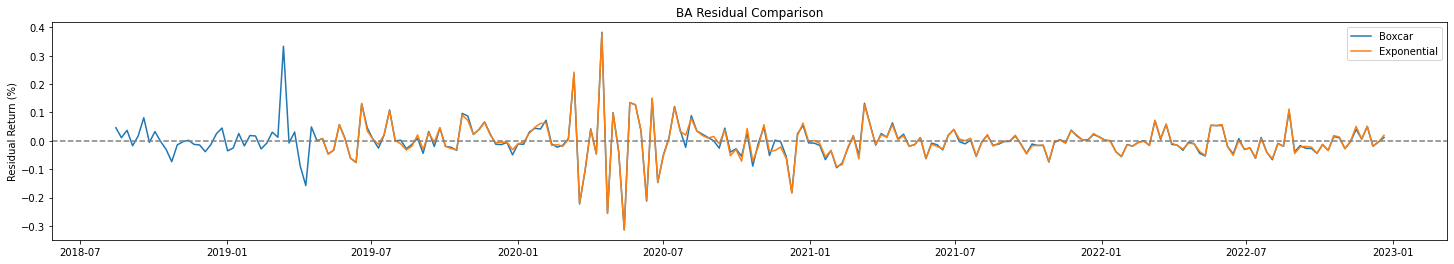

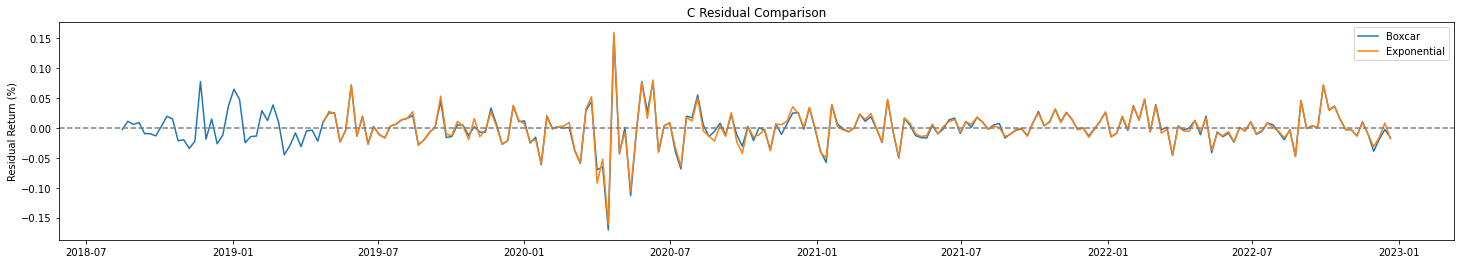

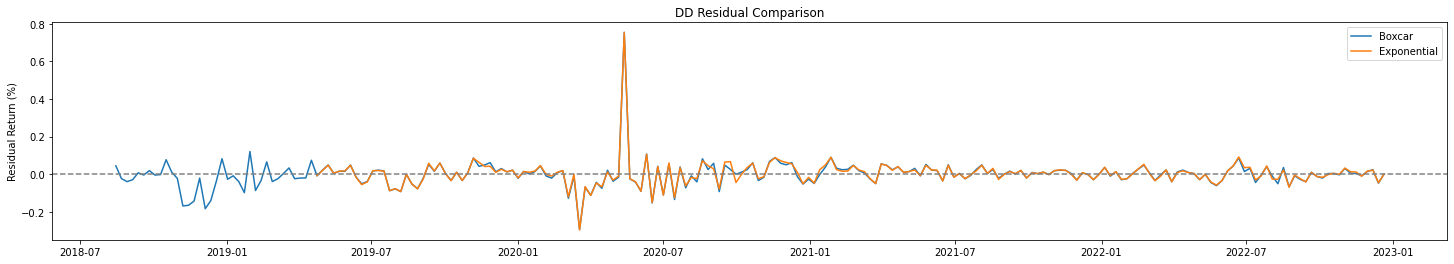

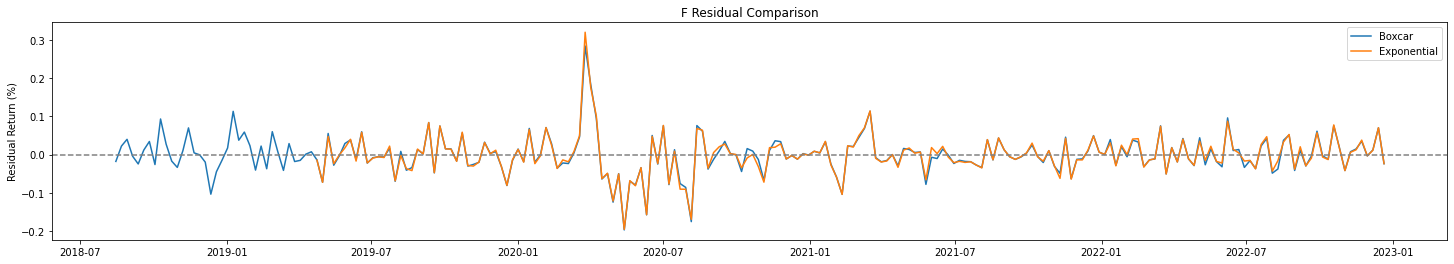

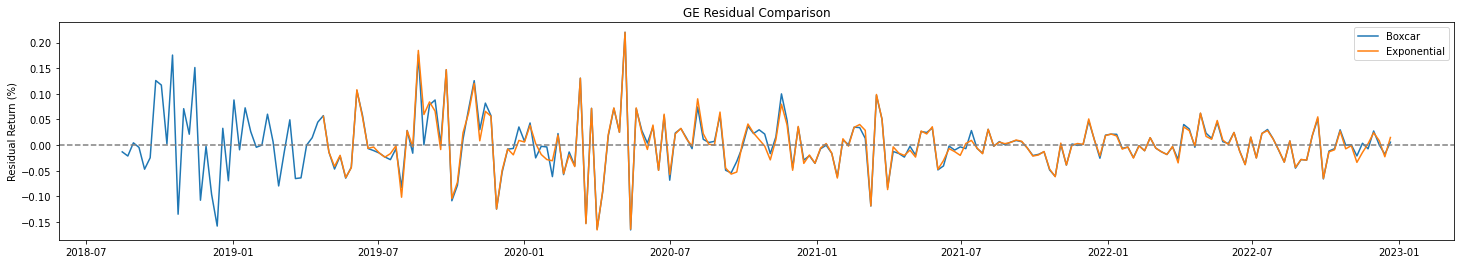

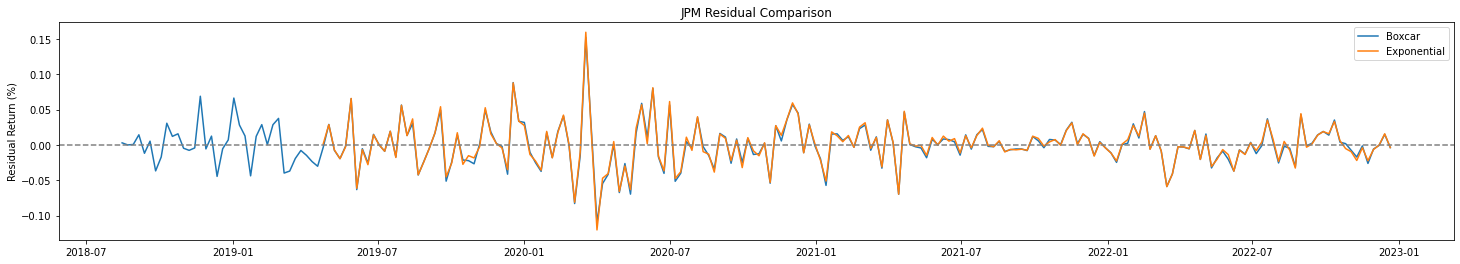

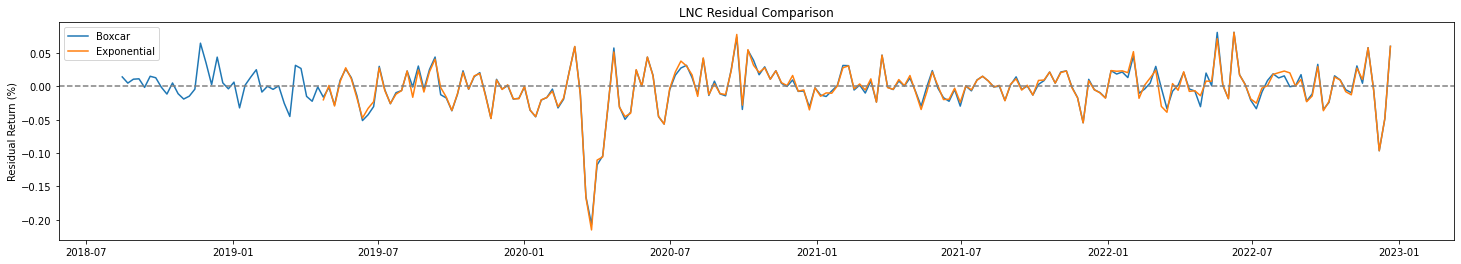

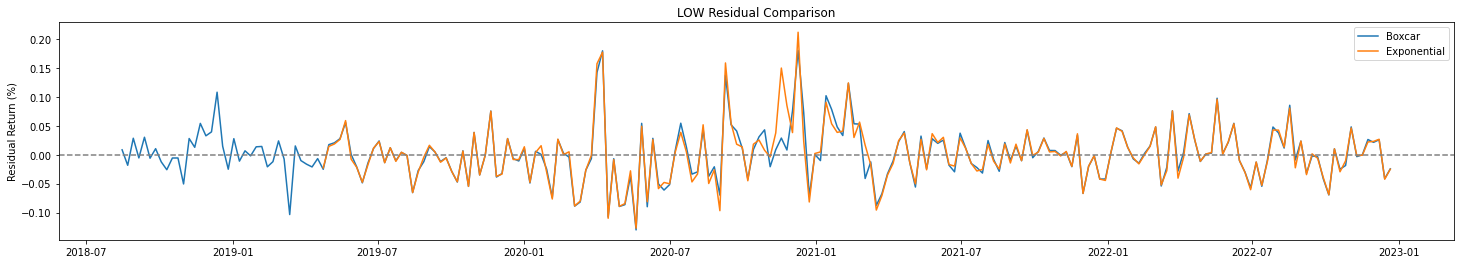

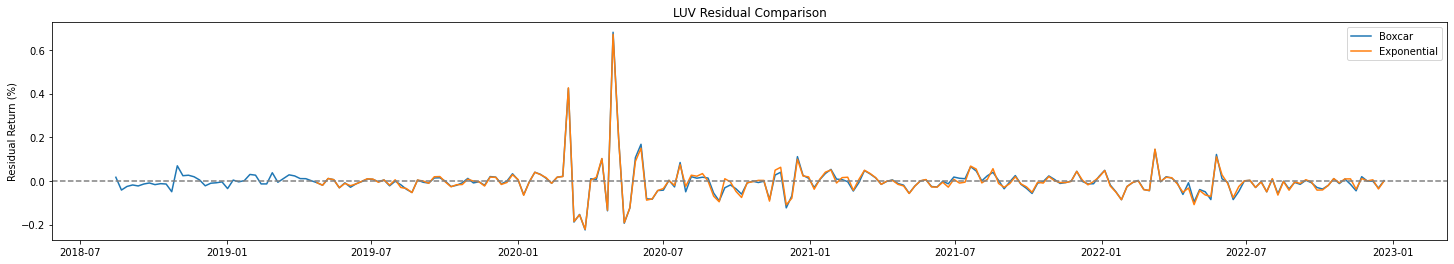

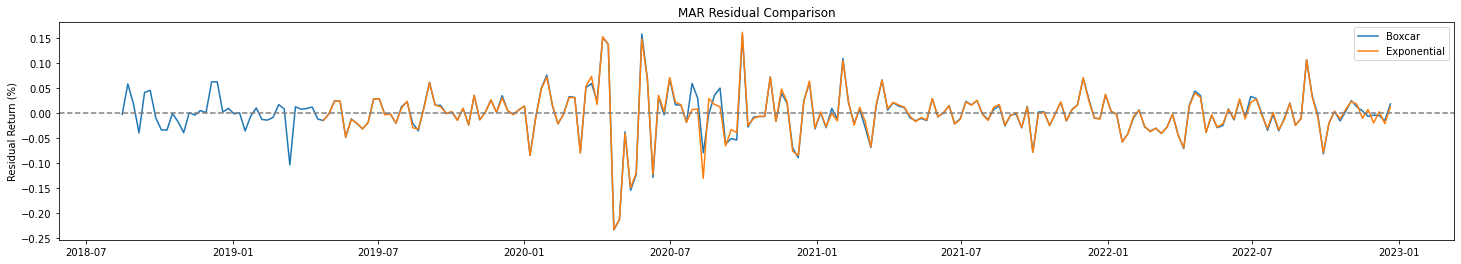

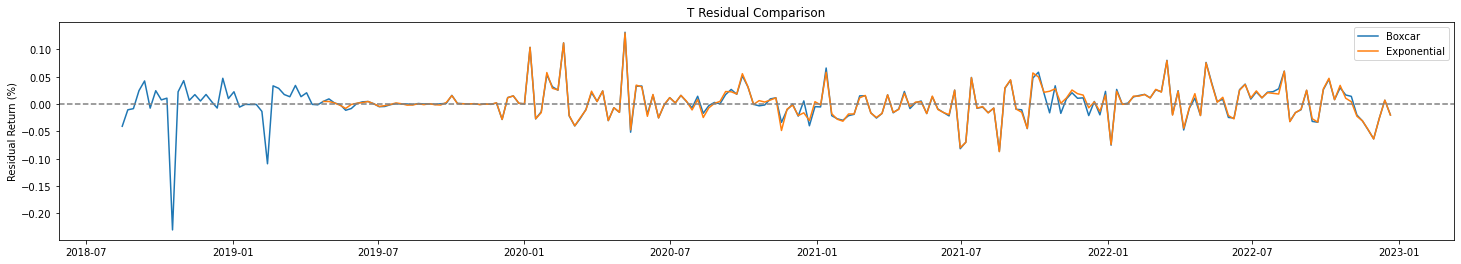

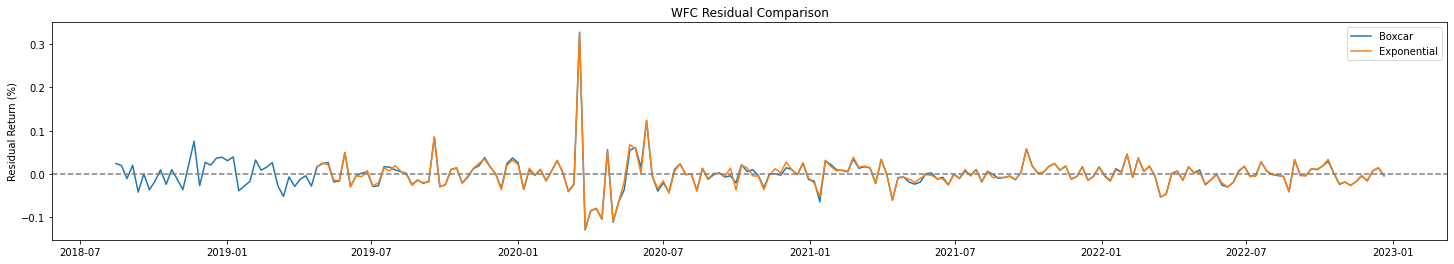

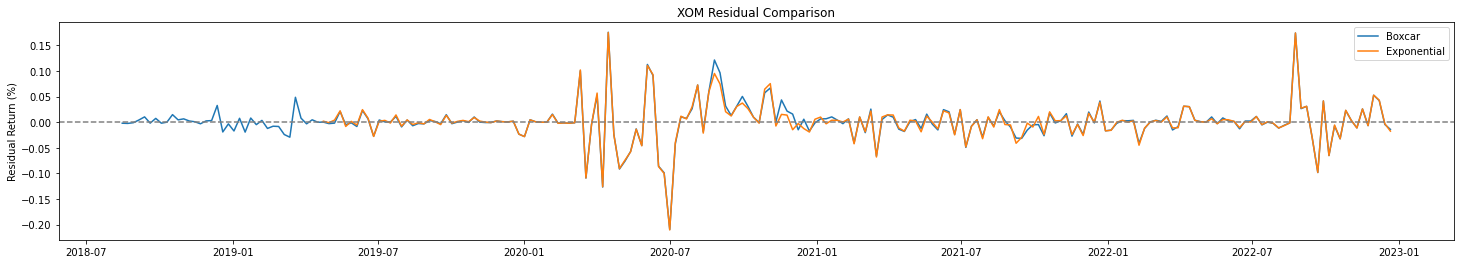

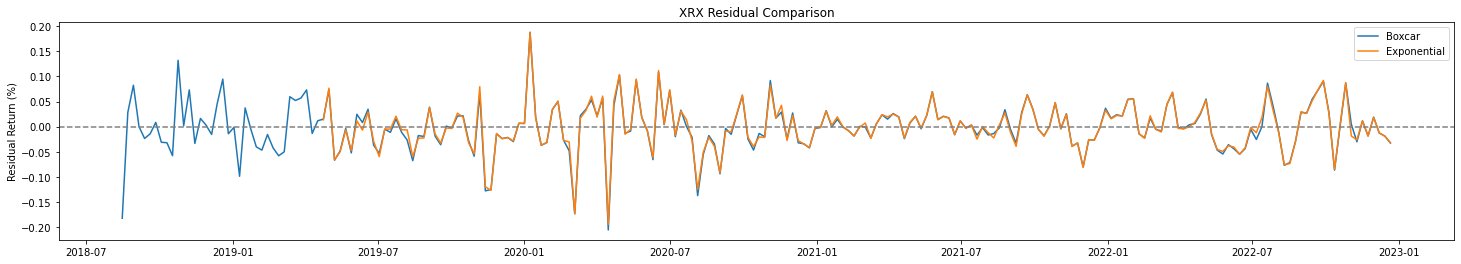

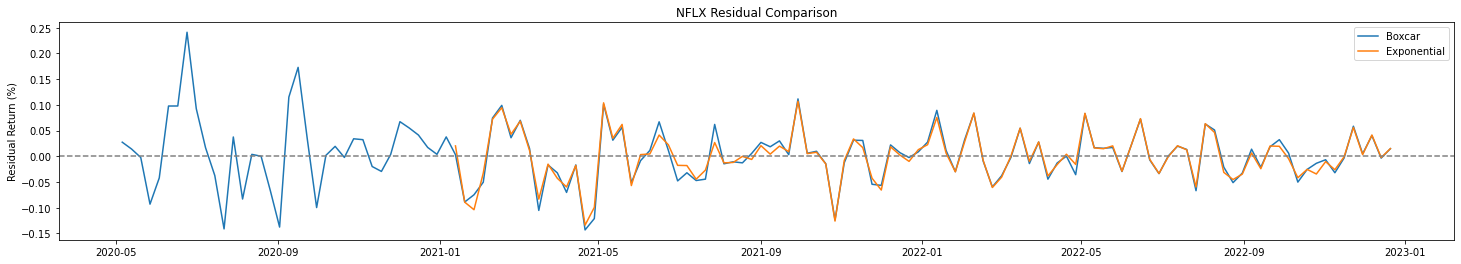

In [279]:
for ticker in tickers:
    plt.figure().set_figwidth(25)
    plt.title(f'{ticker} Residual Comparison')
    plt.ylabel('Residual Return (%)')
    plt.plot(results[f'{ticker} Boxcar Predictive Residual'])
    plt.plot(results[f'{ticker} Exp Decay Predictive Residual'])
    plt.legend(['Boxcar', 'Exponential'])
    plt.axhline(y=0, linestyle='--', color='grey')
    plt.show()

It is clear from the graphs above that the two regressions performed pretty similarly. For the most part they track each other very closely, and hover around zero. It's pretty clear that times of high volatility in the market (like Covid) had a large impact on unexpected residuals, with residuals as high as 60% (DD, LUV) and as low as -30% (BA). This would mean the cds parspreads could not be well predicted by equity returns at this time - not a huge surprise given the volatility of the markets. Due to the impact of Covid on the regressions, it's also not a surprise we see the regressions start to differ slightly in the second half of 2020, since the Boxcar regression uses data as far back as 32 weeks (16 to get the residual returns, and then another 16 weeks to predict the cds residuals). A potential improvement to this model to see if this is a worthwhile trading strategy would be to start analyzing only after June 2020, when the markets had settled a bit, or only use data prior to March 2020. 

In [280]:
def tailMetrics(returns, quantile=.05, annualization=52):
    metrics = pd.DataFrame(index=returns.columns)
    metrics['Abs. Value Mean (annualized)'] = abs(returns.mean() * annualization)
    # metrics['Mean (weekly)'] = returns.mean()
    metrics['Vol'] = returns.std() * np.sqrt(annualization)

    metrics['Min'] = returns.min()
    metrics['Max'] = returns.max()
    metrics['Skewness'] = returns.skew()
    metrics['Kurtosis'] = returns.kurtosis()

    return metrics

metrics_df = tailMetrics(results)
display(metrics_df.sort_values('Abs. Value Mean (annualized)'))

,Abs. Value Mean (annualized),Vol,Min,Max,Skewness,Kurtosis
C Exp Decay Predictive Residual,0.000327,0.223728,-0.161381,0.160275,-0.158472,7.556460
WFC Exp Decay Predictive Residual,0.000676,0.270377,-0.126520,0.323703,3.102922,29.858366
F Boxcar Predictive Residual,0.002921,0.361048,-0.196770,0.284000,0.491756,6.084728
JPM Boxcar Predictive Residual,0.006172,0.217564,-0.110309,0.152037,0.390979,3.391465
C Boxcar Predictive Residual,0.007691,0.220475,-0.170680,0.154737,-0.239893,7.220302
WFC Boxcar Predictive Residual,0.008718,0.263732,-0.128961,0.327433,2.907246,28.970729
JPM Exp Decay Predictive Residual,0.014011,0.222647,-0.120396,0.159497,0.450383,4.475661
NFLX Exp Decay Predictive Residual,0.027317,0.330029,-0.133759,0.107196,-0.217440,0.742767
XOM Exp Decay Predictive Residual,0.032133,0.287787,-0.210342,0.175073,-0.094436,8.058764
BA Boxcar Predictive Residual,0.036666,0.494798,-0.313936,0.382815,0.583939,9.431631


After getting the mean of the residuals on the different regressions, it's clear that the residuals have more to do with the ticker than they do with the type of analysis run. Tickers C, WFC, and JPM had 6 of the 7 smallest mean annualized residuals, and the annualized residual almost doubled when looking after that at row 8. We do see that there are varied skewness values, with some tickers seeming to tend towards more CDS residual (WFC, DD, LUV), while others tend towards negatives (LNC, T). 

If we were to consider a trading strategy based off this information, we would want to invest in the CDS spreads where the prior week's equity residuals best predict it. In this case, the CDS's where the mean, vol and skewness of the predictive model's residuals are closest to zero. In our data probably the C Exponential Decay Regression and F/JPM Boxcar Regressions. We would perhaps not use the WFC regressions due to the high skew, but this might be okay if the 2020 Covid data were removed.

## Further Analysis: Boxcar Window Size 4

16 weeks seems like a long time to let returns have an impact on our regressions, so I am going to rerun the boxcar analysis (from the beginning) using a window of 4 weeks rather than 16. Ideally this should reduce our residuals.

In [281]:
def boxcar_4_reg(equity_returns, market_returns):
    _p = linreg.OLS(equity_returns, market_returns).fit(params_only=True).params
    df = pd.DataFrame(data=[_p], index=[equity_returns.index[-1]])
    df = df.rename(columns={'SPY Returns': 'SPY Beta'})
    return df

capm_betas_2 = pd.DataFrame(index = equity_returns.index)

# For every ticker run a CAPM regression
for col in equity_returns.columns:
    ticker_returns = equity_returns[col].dropna()
    market_returns = market_data[market_data.index.isin(ticker_returns.index.values)]
    market_boxcar_4_coefficients = pd.concat([boxcar_4_reg(ticker_returns.iloc[i-4:i], market_returns['SPY Returns'].iloc[i-4:i]) for i in range(4, ticker_returns.shape[0])])
    ticker = col.split(' ')[0]
    capm_betas_2[f'{ticker} CAPM Beta'] = market_boxcar_4_coefficients
    
capm_betas_2 = capm_betas_2.dropna()

# Then run a regression on cds spreads with equity and index returns
cds_betas_2 = pd.DataFrame(index = cds_returns.index)

for ticker in tickers:
    ticker_cds_returns = cds_returns[f'{ticker} Returns'].dropna()
    index_returns = pd.DataFrame(cds_returns[cds_returns.index.isin(ticker_cds_returns.index.values)]['CDS Index Return']).dropna()
    ticker_equity_returns = equity_returns[equity_returns.index.isin(ticker_cds_returns.index.values)][f'{ticker} Returns'].dropna()
    
    index_returns['Equity Returns'] = ticker_equity_returns
    market_boxcar_4_coefficients = pd.concat([boxcar_4_reg(ticker_cds_returns.iloc[i-4:i], index_returns.iloc[i-4:i]) for i in range(4, ticker_cds_returns.shape[0])])
    cds_betas_2[f'{ticker} Equity Beta'] = market_boxcar_4_coefficients['Equity Returns']
    cds_betas_2[f'{ticker} Index Beta'] = market_boxcar_4_coefficients['CDS Index Return']

# Drop the NAs for the beginning (ignoring Netflix, which has NAs for another 2 years)
cds_betas_2 = cds_betas_2.dropna(subset = ['BA Equity Beta'])
    
hedge_returns_2 = pd.DataFrame(index = equity_data.index)

for ticker in tickers:
    ticker_hedge_returns = cds_betas_2[f'{ticker} Equity Beta'] * equity_returns[f'{ticker} Returns'] + cds_betas_2[f'{ticker} Index Beta'] * cds_returns['CDS Index Return']
    # hedge_returns[f'{ticker} Returns'] = cds_returns[f'{ticker} Returns']
    # hedge_returns[f'{ticker} Hedge Return'] = ticker_hedge_returns
    hedge_returns_2[f'{ticker} Residual Returns'] = cds_returns[f'{ticker} Returns'] - ticker_hedge_returns
    hedge_returns_2[f'{ticker} Residual Equity Returns'] = equity_returns[f'{ticker} Returns'] - (capm_betas_2[f'{ticker} CAPM Beta'] * market_returns['SPY Returns'])

hedge_returns_2 = hedge_returns_2.dropna(subset = ['BA Residual Returns'])

predictive_residuals_2 = pd.DataFrame(index = hedge_returns_2.index)

for ticker in tickers:
    hedge_returns_2[f'{ticker} Residual Equity Returns'] = hedge_returns_2[f'{ticker} Residual Equity Returns'].shift(1)
    shifted_equity_ret = hedge_returns_2[f'{ticker} Residual Equity Returns'].dropna()
    residual_ret = hedge_returns_2[hedge_returns_2.index.isin(shifted_equity_ret.index.values)][f'{ticker} Residual Returns']
    # market_returns = market_data[market_data.index.isin(ticker_returns.index.values)]
    market_boxcar_4_coefficients = pd.concat([boxcar_4_reg(residual_ret.iloc[i-4:i], shifted_equity_ret.iloc[i-4:i]) for i in range(4, residual_ret.shape[0])])
    predictive_residuals_2[f'{ticker} Predictive Beta'] = market_boxcar_4_coefficients
    
predictive_residuals_2 = predictive_residuals_2.dropna(subset = ['BA Predictive Beta'])

results_boxcar_4 = pd.DataFrame(index = predictive_residuals.index)

for ticker in tickers:
    results_boxcar_4[f'{ticker} Boxcar 4 Predictive Residual'] = hedge_returns_2[f'{ticker} Residual Returns'] - predictive_residuals_2[f'{ticker} Predictive Beta']*hedge_returns_2[f'{ticker} Residual Equity Returns']
    
display(results_boxcar_4.head(5))


,BA Boxcar 4 Predictive Residual,C Boxcar 4 Predictive Residual,DD Boxcar 4 Predictive Residual,F Boxcar 4 Predictive Residual,GE Boxcar 4 Predictive Residual,JPM Boxcar 4 Predictive Residual,LNC Boxcar 4 Predictive Residual,LOW Boxcar 4 Predictive Residual,LUV Boxcar 4 Predictive Residual,MAR Boxcar 4 Predictive Residual,T Boxcar 4 Predictive Residual,WFC Boxcar 4 Predictive Residual,XOM Boxcar 4 Predictive Residual,XRX Boxcar 4 Predictive Residual,NFLX Boxcar 4 Predictive Residual
date,,,,,,,,,,,,,,,
2018-08-15,-0.009320,0.000040,-0.004077,0.004114,-0.017712,0.009085,0.004699,0.015198,0.004766,-0.003837,0.007463,0.008248,-0.000162,-0.079411,NaN
2018-08-22,0.006874,0.001213,-0.013973,0.021922,-0.002672,-0.007524,0.008070,-0.004722,-0.028063,0.043813,-0.022390,0.015533,-0.003543,0.023967,NaN
2018-08-29,0.041421,0.002900,0.004940,0.009513,-0.036835,-0.000460,0.001088,0.000452,-0.001783,0.015331,-0.016442,-0.000022,-0.002561,0.007159,NaN
2018-09-05,-0.011117,-0.000204,-0.026371,-0.008451,0.009487,0.010969,0.005992,0.000235,-0.024859,-0.010419,0.026174,0.005960,0.004596,-0.015743,NaN
2018-09-12,-0.006533,-0.000697,-0.006987,-0.027939,-0.014931,-0.001271,0.005438,0.006199,-0.008769,-0.010590,0.007109,-0.000596,0.006056,-0.006668,NaN


## Comparing Boxcar 16 and Boxcar 4

Now that we have residuals from a Boxcar regression with window 4, let's compare it to the previous Boxcar 16 we've done.

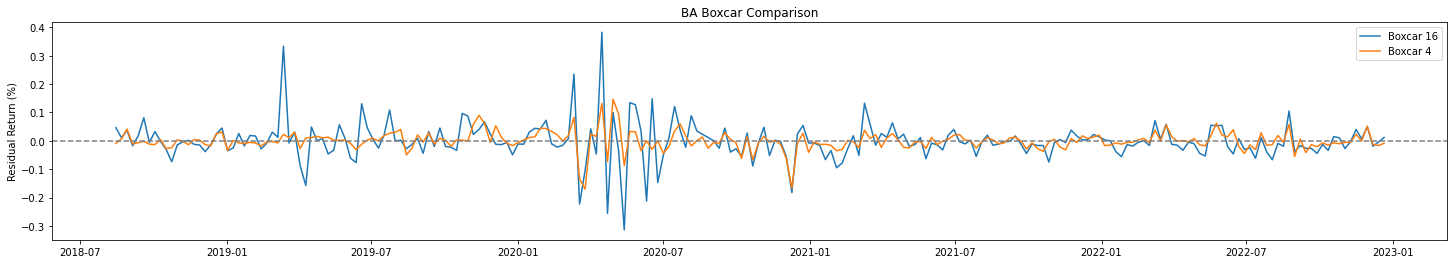

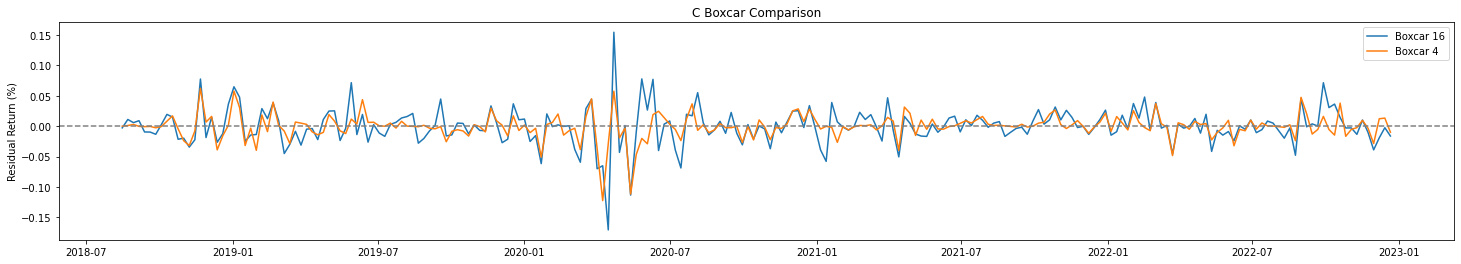

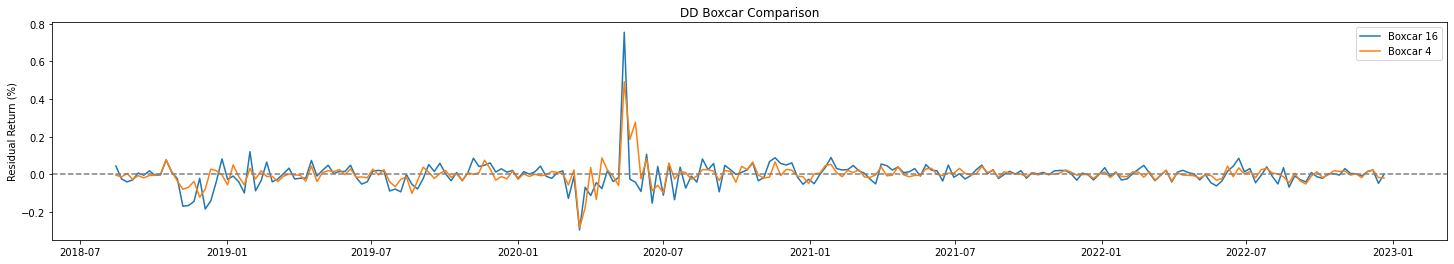

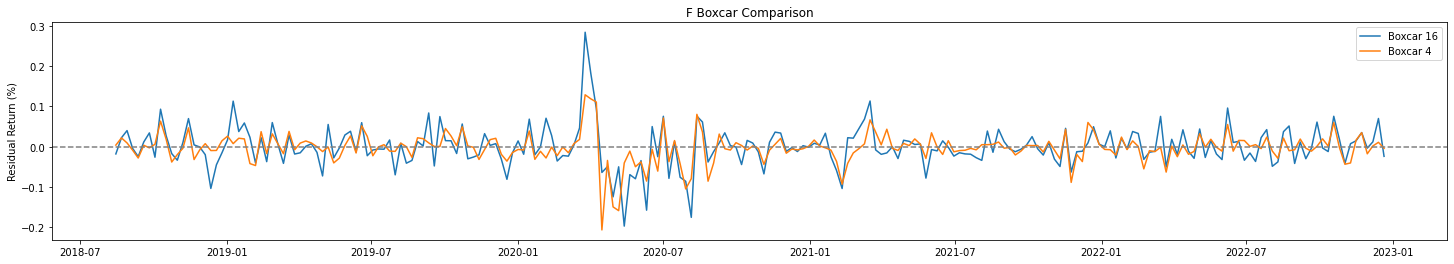

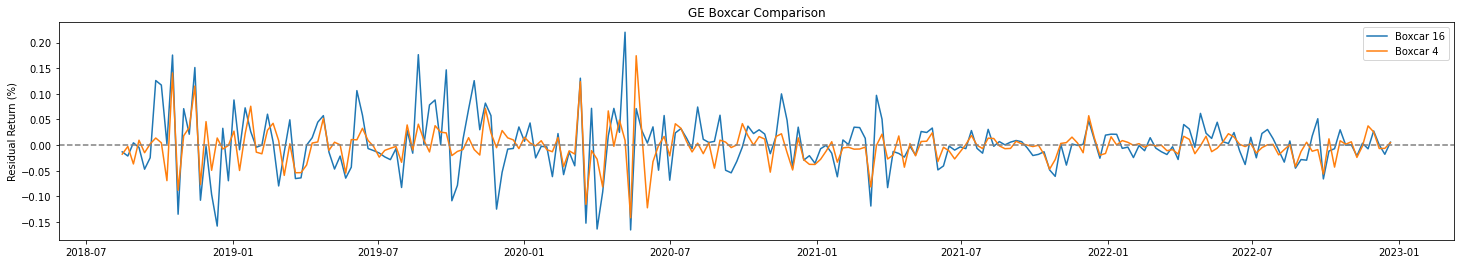

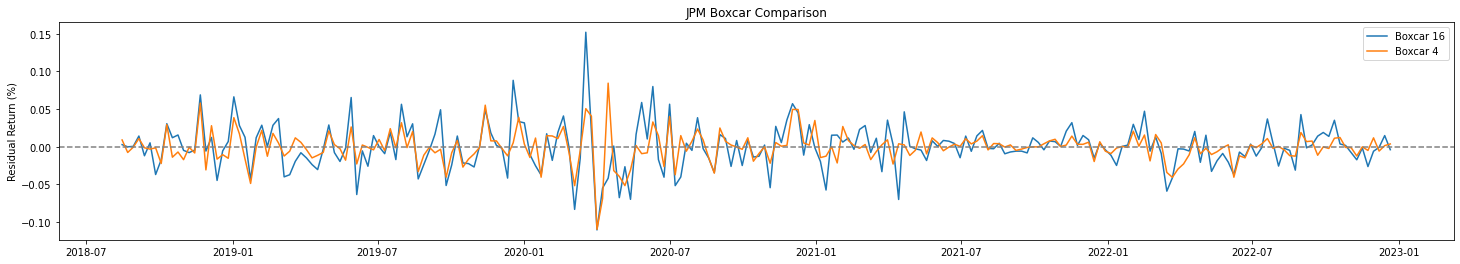

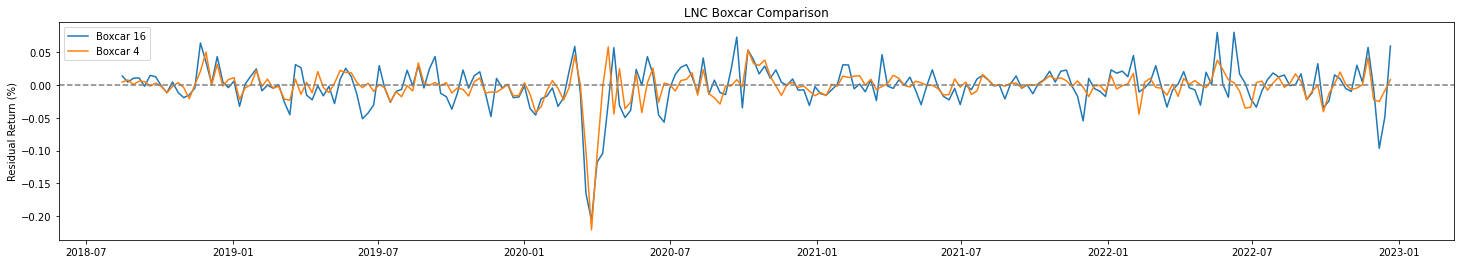

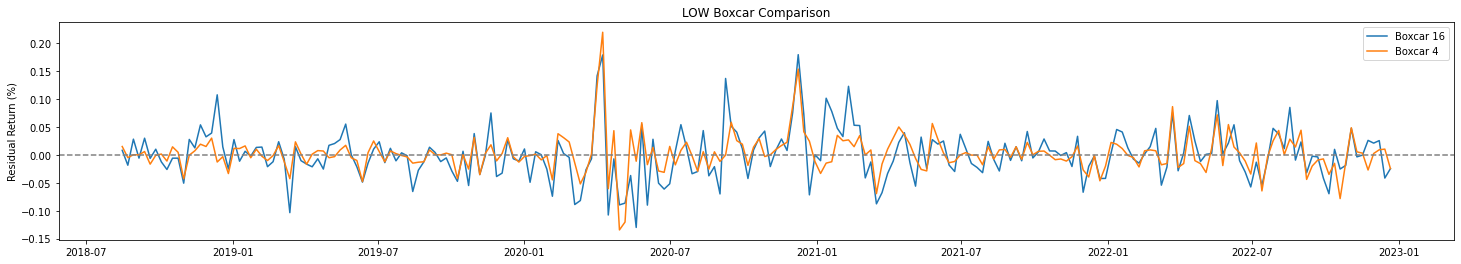

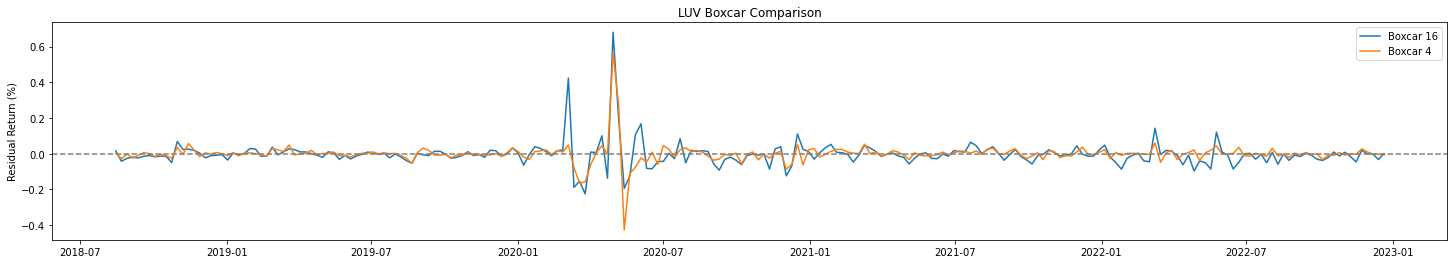

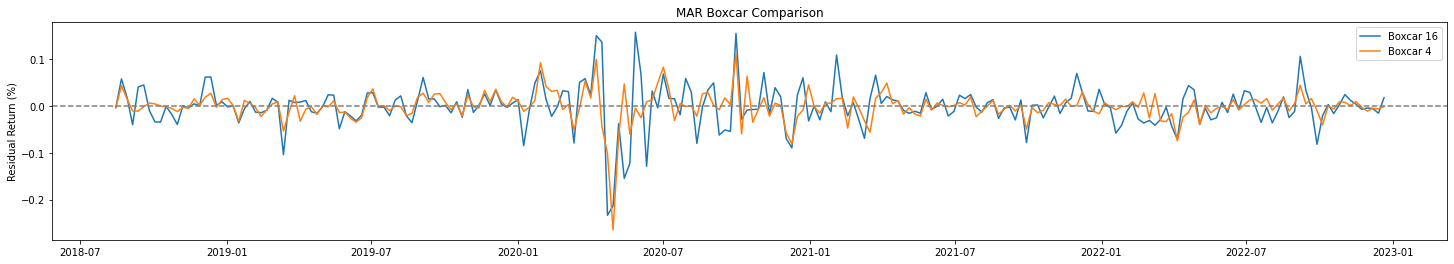

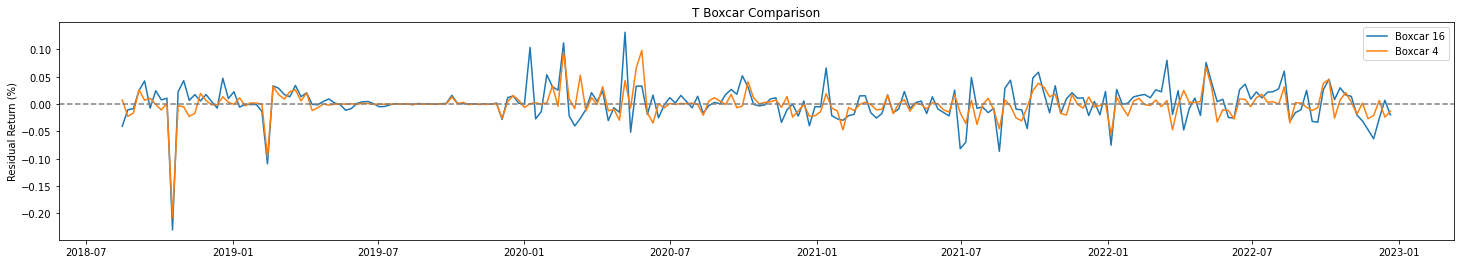

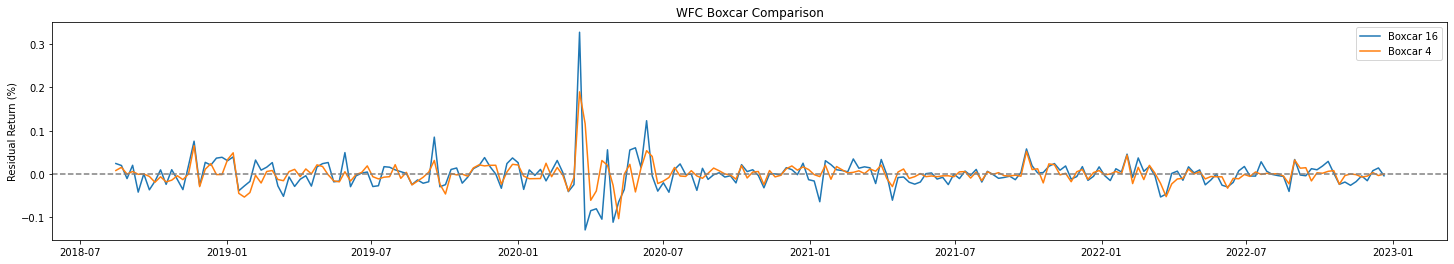

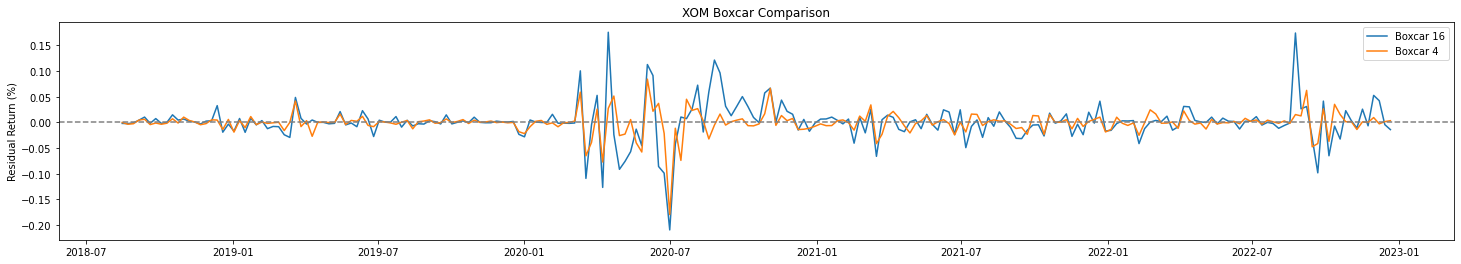

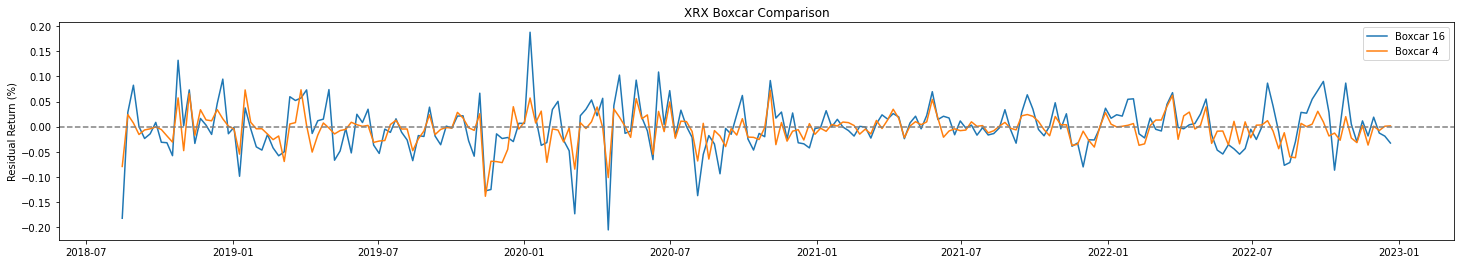

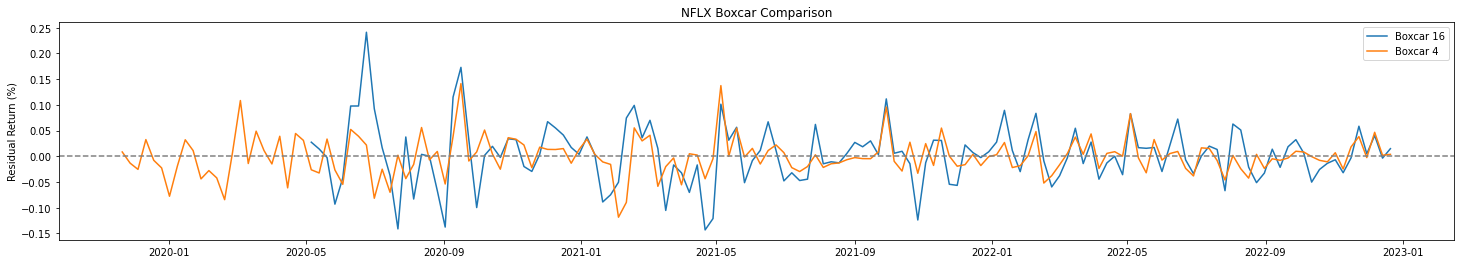

In [282]:
for ticker in tickers:
    plt.figure().set_figwidth(25)
    plt.title(f'{ticker} Boxcar Comparison')
    plt.ylabel('Residual Return (%)')
    plt.plot(results[f'{ticker} Boxcar Predictive Residual'])
    plt.plot(results_boxcar_4[f'{ticker} Boxcar 4 Predictive Residual'])
    plt.legend(['Boxcar 16', 'Boxcar 4'])
    plt.axhline(y=0, linestyle='--', color='grey')
    plt.show()

Not unexpectedly, the Boxcar with window size 4 trends with the boxcar window size 16, but with (what appears to be) less volatility. It seems to hover more closely around zero, which seems to imply it's a better way to predict CDS spreads. This is what we would expect to happen, as it uses more recent data to predict equity returns, which then is used to predict the CDS spread for the next week. Let's analyze with the same metrics as before to double check our intuition.

In [283]:
metrics_df = tailMetrics(results)
metrics_df_2 = tailMetrics(results_boxcar_4)
result = pd.concat([metrics_df, metrics_df_2])
# gen = 'Boxcar' in i for i in result.index.values
result = result.loc[['F Boxcar Predictive Residual', 'F Boxcar 4 Predictive Residual',
                     'C Boxcar Predictive Residual', 'C Boxcar 4 Predictive Residual',
                     'T Boxcar Predictive Residual', 'T Boxcar 4 Predictive Residual',
                     'WFC Boxcar Predictive Residual', 'WFC Boxcar 4 Predictive Residual',
                     'DD Boxcar Predictive Residual', 'DD Boxcar 4 Predictive Residual',
                     'JPM Boxcar Predictive Residual', 'JPM Boxcar 4 Predictive Residual',
                     'NFLX Boxcar Predictive Residual', 'NFLX Boxcar 4 Predictive Residual',
                     'BA Boxcar Predictive Residual', 'BA Boxcar 4 Predictive Residual',
                     'MAR Boxcar Predictive Residual', 'MAR Boxcar 4 Predictive Residual',
                     'XOM Boxcar Predictive Residual', 'XOM Boxcar 4 Predictive Residual',
                     'LUV Boxcar Predictive Residual', 'LUV Boxcar 4 Predictive Residual',
                     'XRX Boxcar Predictive Residual', 'XRX Boxcar 4 Predictive Residual',
                     'LOW Boxcar Predictive Residual', 'LOW Boxcar 4 Predictive Residual',
                     'GE Boxcar Predictive Residual', 'GE Boxcar 4 Predictive Residual',
                     'LNC Boxcar Predictive Residual', 'LNC Boxcar 4 Predictive Residual']]
display(result.sort_index())

,Abs. Value Mean (annualized),Vol,Min,Max,Skewness,Kurtosis
BA Boxcar 4 Predictive Residual,0.009454,0.246213,-0.170079,0.146785,-0.524359,7.567033
BA Boxcar Predictive Residual,0.036666,0.494798,-0.313936,0.382815,0.583939,9.431631
C Boxcar 4 Predictive Residual,0.026637,0.148920,-0.122424,0.062404,-1.330411,8.871829
C Boxcar Predictive Residual,0.007691,0.220475,-0.170680,0.154737,-0.239893,7.220302
DD Boxcar 4 Predictive Residual,0.004995,0.398076,-0.284326,0.493149,2.973451,33.492524
DD Boxcar Predictive Residual,0.086336,0.526681,-0.295428,0.755383,4.349651,51.393692
F Boxcar 4 Predictive Residual,0.153586,0.266163,-0.206224,0.128942,-0.997764,6.958278
F Boxcar Predictive Residual,0.002921,0.361048,-0.196770,0.284000,0.491756,6.084728
GE Boxcar 4 Predictive Residual,0.101555,0.251987,-0.141887,0.174437,0.449394,6.147111
GE Boxcar Predictive Residual,0.119173,0.399477,-0.165626,0.220291,0.239154,2.375965


In every single instance above, we reduced the volatility by using a Boxcar 4 vs a Boxcar 16. However, the magnitudes of the means only improved for 8 of the tickers by using the smaller window. This is a bit of a surprise, as I expected the means to go down with residuals closer to zero. What we did see that was promising is generally improved mins and maxes by using the smaller window. By reducing the noise from data farther back in our time series, we managed to reduce any extreme incorrect predictions, which would lead to an overall less risky strategy were we ever to use this regression for prediction. 

## Conclusion

Overall, we saw roughly equal predictions from Boxcar and Exponential Decay. They were both heavily impacted in times of volatility, and tracked each other very closely throughout the time series. We saw less volatile predictions using a Boxcar with a window size of 4, though the mean of the residuals didn't really improve. Overall I would say that these predictive regressions do have value to a potential strategy on CDS spreads, though they perform better when the market is less volatile. In addition to shortening the Boxcar window, there are a few other improvements that could be tried to see if we could get a better prediction. 

We could use a shorter time window, going down from one week to bi-weekly (if the CDS data is frequent enough to allow this). We could shorten the half-life of the exponential decay regression, so that data further back in the time series had less of an impact on the next prediction. We could also look at bringing in other factors we believe might impact the CDS spreads (Quarterly Earnings calls, Company News, etc). All of these changes would potentially lead to smaller residuals, and a better prediction of where CDS spreads are going based on the prior week's Equity returns.